# A made-up multiple-class classification problem

In [19]:
%run src.ipynb

## Create sample clustered data
We use scikit-learn make_blob function to create clusters of data around 4 different (x,y) center points.

In [20]:
X, y = make_blobs(n_samples=100, centers=[[-4, 2], [-2, -2], [3, 2], [5, -2]], cluster_std=1)
print(f"X.shape = {X.shape}")
print(f"y.shape = {y.shape}")
print(f"X[0:7,:] =\n {X[0:7,:]}")
print(f"y[0:7] = {y[0:7]}")
print(f"np.unique(y) = {np.unique(y)}")

X.shape = (100, 2)
y.shape = (100,)
X[0:7,:] =
 [[ 6.18378345 -1.82591768]
 [-0.16529921 -0.61662645]
 [ 2.0451271   1.39659221]
 [-3.29766269  2.58359451]
 [ 4.88002226 -0.59059992]
 [ 5.47394872  2.74620896]
 [-3.84657788  1.82062174]]
y[0:7] = [3 1 2 0 3 2 0]
np.unique(y) = [0 1 2 3]


## Display the data

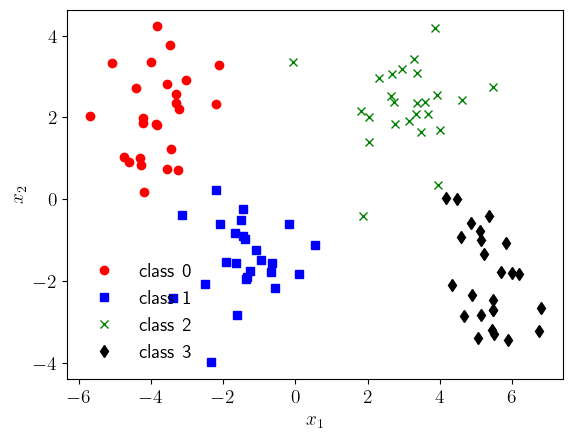

In [21]:
marker = ['or','sb','xg','dk']

for i in range(4):
    index = y == i
    plt.plot(X[index,0],X[index,1],marker[i],label=f"class {i}")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend(frameon=False)

plt.show()

## Normalize the data using keras

In [22]:
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)
Xn = norm_l(X).numpy()

## Creat a neural network
Let's consider 1 hidden layer with 2 ReLU units, and an output **softmax** layer.

In [23]:
model = Sequential([
    tf.keras.Input(shape=(2,)),
    Dense(units=2, activation='relu', name = "L1"),
    Dense(units=4, activation='softmax', name = "L2")
])

W1, b1 = model.get_layer("L1").get_weights()
print(f"W1.shape = {W1.shape}; b1.shape = {b1.shape}")
print(f"W1 =\n{W1}\nb1 =\n {b1}")

model.summary()

W1.shape = (2, 2); b1.shape = (2,)
W1 =
[[-1.1777648   1.1097189 ]
 [ 0.61041164 -0.6500264 ]]
b1 =
 [0. 0.]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 2)                 6         
                                                                 
 L2 (Dense)                  (None, 4)                 12        
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


## Compile with Adam optimization

In [24]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.01)
)

model.fit(
    Xn,y,
    epochs=200,
    verbose = 0
)

## Prediction accuracy

In [25]:
# expect class 2
x1 = 4
x2 = 3
X_testn = norm_l(np.array([[x1,x2]]))
p = model.predict(X_testn, verbose = 0)
print(f"all predictions = {p}")
print(f"predictions (expect class 2) = {np.argmax(p)}")

# expect class 1
x1 = -2
x2 = -3
X_testn = norm_l(np.array([[x1,x2]]))
p = model.predict(X_testn, verbose = 0)
print(f"all predictions = {p}")
print(f"predictions (expect class 1) = {np.argmax(p)}")

all predictions = [[0.0048903  0.01821746 0.97145575 0.00543642]]
predictions (expect class 2) = 2
all predictions = [[7.1077020e-09 9.9998093e-01 1.6400792e-05 2.5680934e-06]]
predictions (expect class 1) = 1


In [26]:
p = model.predict(Xn, verbose = 0)
classification = np.argmax(p,axis=1)
print(f"The training accuracy is {np.mean(classification == y)*100}%")

The training accuracy is 99.0%
